# Working with Dates and Times in Python

**Descripción del curso**

Probablemente nunca tendrá una máquina del tiempo, pero ¿qué tal una máquina para analizar el tiempo? Tan pronto como entra el tiempo en cualquier análisis, las cosas pueden ponerse raras. 
Es fácil tropezarse con los límites del día y el mes, las zonas horarias, el horario de verano y todo tipo de cosas que pueden confundir a los que no están preparados. Si va a hacer algún tipo de análisis que implique tiempo, querrá usar Python para resolverlo. Trabajando con conjuntos de datos sobre huracanes y viajes en bicicleta, cubriremos el recuento de eventos, averiguando cuánto tiempo ha pasado entre eventos y trazando datos a lo largo del tiempo. Trabajará tanto en Python estándar como en Pandas, y tocaremos la biblioteca dateutil, la única biblioteca de zona horaria respaldada por la documentación oficial de Python. Después de este curso, manejará con confianza los datos de fecha y hora en cualquier formato como un campeón. 


In [ ]:
# DATASET
import pickle
file = '../datasets/florida_hurricane_dates.pkl'
with open(file,'rb') as file: # rb: Especifica que es de lectura y binario
    florida_hurricane_dates = pickle.load(file)
# print(florida_hurricane_dates)

In [1]:
# CARGAR DATASET
PATH_BASIC = "https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/datasets/"

## 1. Dates and Calendars

### Dates in Python

In [ ]:
from datetime import date
hurricane_andrew = date(1992, 8, 24)
print(hurricane_andrew.weekday()) # dia de la semana 0-lunes | 6-domingo

0


In [ ]:
# .day, .year, .weekday()
print(hurricane_andrew.month)

8


In [ ]:
from datetime import date

start = date(2007,5,9)
end = date(2007,12,13)

print((end - start).days)

218


### Math with dates

In [ ]:
hurricanes_each_month = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6:0,
		  				 7: 0, 8:0, 9:0, 10:0, 11:0, 12:0}

# Loop over all hurricanes
for hurricane in florida_hurricane_dates:
  # Pull out the month
  month = hurricane.month
  # Increment the count in your dictionary by one
  hurricanes_each_month[month] += 1
print(hurricanes_each_month)

{1: 0, 2: 1, 3: 0, 4: 1, 5: 8, 6: 32, 7: 21, 8: 49, 9: 70, 10: 43, 11: 9, 12: 1}


In [ ]:
print(florida_hurricane_dates[0])
print(florida_hurricane_dates[-1])

# Put the dates in order
dates_ordered = sorted(florida_hurricane_dates)

# Print the first and last ordered dates
print(florida_hurricane_dates[0])
print(florida_hurricane_dates[-1])

1988-08-04
2011-07-18
1988-08-04
2011-07-18


### Turning dates into strings

In [ ]:
first_date = sorted(florida_hurricane_dates)[0]

# Convert to ISO and US formats
iso = "Our earliest hurricane date: " + first_date.isoformat()
us = "Our earliest hurricane date: " + first_date.strftime("%m/%d/%Y")

print("ISO: " + iso)
print("US: " + us)

ISO: Our earliest hurricane date: 1950-08-31
US: Our earliest hurricane date: 08/31/1950


In [ ]:
from datetime import date

# Create a date object
andrew = date(1992, 8, 26)
print(andrew.strftime("%Y-%m"))
print(andrew.strftime("%B (%Y)"))
print(andrew.strftime("%Y-%j"))

1992-08
August (1992)
1992-239


In [ ]:
True%20

1

## 2. Combining Dates and Times

### Dates and times

In [ ]:
from datetime import datetime

# Create a datetime object
dt = datetime(2017, 10, 1, 15, 26, 26)

# Print the results in ISO 8601 format
print(dt.isoformat())

2017-10-01T15:26:26


In [ ]:
dt_old = dt.replace(year=1917)

# Print the results in ISO 8601 format
print(dt_old)

1917-10-01 15:26:26


In [ ]:
trip_counts = {'AM': 0, 'PM': 0}
  
# Loop over all trips
for trip in onebike_datetimes:
  # Check to see if the trip starts before noon
    print(trip['start'].hour)
    if trip['start'].hour < 12:
    # Increment the counter for before noon
        trip_counts['AM'] += 1
    else:
    # Increment the counter for after noon
        trip_counts['PM'] += 1
  

NameError: name 'onebike_datetimes' is not defined

### Printing and parsing datetimes

In [ ]:
from datetime import datetime

# Starting string, in YYYY-MM-DD HH:MM:SS format
s = '2017-02-03 00:00:01'

# Write a format string to parse s
fmt = '%Y-%m-%d %H:%M:%S'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

2017-02-03 00:00:01


In [ ]:
from datetime import datetime

# Starting string, in MM/DD/YYYY HH:MM:SS format
s = '12/15/1986 08:00:00'

# Write a format string to parse s
fmt = '%m/%d/%Y %H:%M:%S'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

1986-12-15 08:00:00


In [ ]:
fmt = "%Y-%m-%d %H:%M:%S"

# Initialize a list for holding the pairs of datetime objects
onebike_datetimes = []

# Loop over all trips
for (start, end) in onebike_datetime_strings:
  trip = {'start': datetime.strptime(start, fmt),
          'end': datetime.strptime(end, fmt)}
  
  # Append the trip
  onebike_datetimes.append(trip)

NameError: name 'onebike_datetime_strings' is not defined

In [ ]:
from datetime import datetime

# first_start = onebike_datetimes[0]['start']
first_start = datetime(2017, 10, 1, 15, 23, 25)

# Format to feed to strftime()
fmt = "%Y-%m-%dT%H:%M:%S"

# Print out date with .isoformat(), then with .strftime() to compare
print(first_start.isoformat())
print(first_start.strftime(fmt))

2017-10-01T15:23:25
2017-10-01 15:23:25


In [ ]:
from datetime import datetime

# Starting timestamps
timestamps = [1514665153, 1514664543]

# Datetime objects
dts = []

# Loop
for ts in timestamps:
  dts.append(datetime.fromtimestamp(ts))
  
# Print results
print(dts)

[datetime.datetime(2017, 12, 30, 15, 19, 13), datetime.datetime(2017, 12, 30, 15, 9, 3)]


### Working with durations

In [ ]:
onebike_datetimes

NameError: name 'onebike_datetimes' is not defined

In [ ]:
onebike_durations = []

for trip in onebike_datetimes:
  # Create a timedelta object corresponding to the length of the trip
  trip_duration = trip['end'] - trip['start']
  
  # Get the total elapsed seconds in trip_duration
    trip_length_seconds = trip_duration.total_seconds()
  
  # Append the results to our list
    onebike_durations.append(trip_length_seconds)

In [ ]:
# What was the total duration of all trips?
total_elapsed_time = sum(onebike_durations)

# What was the total number of trips?
number_of_trips = len(onebike_durations)
  
# Divide the total duration by the number of trips
print(total_elapsed_time / number_of_trips)

In [ ]:
shortest_trip = min(onebike_durations)
longest_trip = max(onebike_durations)

# Print out the results
print("The shortest trip was " + str(shortest_trip) + " seconds")
print("The longest trip was " + str(longest_trip) + " seconds")

## 3. Time Zones and Daylight Saving

### UTC offsets

In [ ]:
# Import datetime, timezone
from datetime import datetime, timezone, timedelta

# October 1, 2017 at 15:26:26, UTC
UTC = timezone(timedelta(hours=0))
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=UTC)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26+00:00


In [ ]:
from datetime import datetime, timedelta, timezone

# Create a timezone for Pacific Standard Time, or UTC-8
pst = timezone(timedelta(hours=-8))

# October 1, 2017 at 15:26:26, UTC-8
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=pst)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26-08:00


In [ ]:
from datetime import datetime, timedelta, timezone

# Create a timezone for Australian Eastern Daylight Time, or UTC+11
aedt = timezone(timedelta(hours=11))

# October 1, 2017 at 15:26:26, UTC+11
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=aedt)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26+11:00


In [ ]:
# Setear la zona horaria "UTC-4" a las columnas star y end

# Create a timezone object corresponding to UTC-4
edt = timezone(timedelta(hours=-4))

# Loop over trips, updating the start and end datetimes to be in UTC-4
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo=edt)
  trip['end'] = trip['end'].replace(tzinfo=edt)

In [ ]:
# Veamos ahora ya zona horaria pero en UTC
for trip in onebike_datetimes[:10]:
    # Pull out the start
    dt = trip['start']
    # Move dt to be in UTC
    dt = dt.astimezone(timezone.utc)

    # Print the start time in UTC
    print('Original:', trip['start'], '| UTC:', dt.isoformat())

### Time zone database

In [ ]:
# Import tz
from dateutil import tz

# Create a timezone object for Eastern Time
et = tz.gettz('America/New_York')

# Loop over trips, updating the datetimes to be in Eastern Time
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo=et)
  trip['end'] = trip['end'].replace(tzinfo=et)

In [ ]:
# mover una fecha y hora de una zona horaria a otra, use .astimezone
uk = tz.gettz('Europe/London')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in the UK?
notlocal = local.astimezone(uk)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

In [ ]:
# Create the timezone object
ist = tz.gettz('Asia/Kolkata')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in India?
notlocal = local.astimezone(ist)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

In [ ]:
# Create the timezone object
sm = tz.gettz('Pacific/Apia')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in Samoa?
notlocal = local.astimezone(sm)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

### Starting daylight saving time

In [ ]:
# Import datetime, timedelta, tz, timezone
from datetime import datetime, timedelta, timezone
from dateutil import tz

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start + timedelta(hours=6) # Agregar + 6 hours
print(start.isoformat() + " to " + end.isoformat())

# How many hours have elapsed?
print((end - start).total_seconds()/(60*60))

#Mueva sus objetos de fecha y hora en UTC 
print((end.astimezone(tz.UTC) - start.astimezone(tz.UTC))\
      .total_seconds()/(60*60))

In [ ]:
# Import datetime and tz
from datetime import datetime
from dateutil import tz

# Create starting date
el= tz.gettz('Europe/London')

dt = datetime(2000, 3, 29, tzinfo = el)

# Loop over the dates, replacing the year, and print the ISO timestamp
for y in range(2000, 2011):
  print(dt.replace(year=y).isoformat())

### Ending daylight saving time

In [ ]:
for trip in onebike_datetimes:
  # Rides with ambiguous start
  if tz.datetime_ambiguous(trip['start']):
    print("Ambiguous start at " + str(trip['start']))
  # Rides with ambiguous end
  if tz.datetime_ambiguous(trip['end']):
    print("Ambiguous end at " + str(trip['end']))

In [ ]:
# MANEJAR PROBLEMAS CON EL CAMBIO DE HORARIO DE VERANO

trip_durations = []
for trip in onebike_datetimes:
  # When the start is later than the end, set the fold to be 1
  if trip['start'] > trip['end']:
    trip['end'] = tz.enfold(trip['end'])
  # Convert to UTC
  start = trip['start'].astimezone(tz.UTC)
  end = trip['end'].astimezone(tz.UTC)

  # Subtract the difference
  trip_length_seconds = (end-start).total_seconds()
  trip_durations.append(trip_length_seconds)

# Take the shortest trip duration
print("Shortest trip: " + str(min(trip_durations)))

## 4.   Easy and Powerful: Dates and Times in Pandas



### Reading date and time data in Pandas

In [25]:
# Cargando la data
import pandas as pd

# Convertir columnas a Fecha y hora
rides = pd.read_csv(PATH_BASIC + 'capital-onebike.csv', 
                    parse_dates = ['Start date','End date'])

# Dar formato a la Fecha y hora
rides.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [26]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start date            290 non-null    datetime64[ns]
 1   End date              290 non-null    datetime64[ns]
 2   Start station number  290 non-null    int64         
 3   Start station         290 non-null    object        
 4   End station number    290 non-null    int64         
 5   End station           290 non-null    object        
 6   Bike number           290 non-null    object        
 7   Member type           290 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 18.2+ KB


In [27]:
print(rides.iloc[0])

Start date                        2017-10-01 15:23:25
End date                          2017-10-01 15:26:26
Start station number                            31038
Start station                    Glebe Rd & 11th St N
End station number                              31036
End station             George Mason Dr & Wilson Blvd
Bike number                                    W20529
Member type                                    Member
Name: 0, dtype: object


In [28]:
# Subtract the start date from the end date
ride_durations = rides['End date'] - rides['Start date']

# Convert the results to seconds
rides['Duration'] = ride_durations.dt.total_seconds()

print(rides['Duration'].head())

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64


In [29]:
# OTRA FORMA
rides['Duration'] = (rides['End date'] - rides['Start date']).dt.total_seconds()

print(rides['Duration'].head())

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64


### Summarizing datetime data in Pandas

In [30]:
# Create joyrides
joyrides = (rides['Start station'] == rides['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration'].median()))

6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


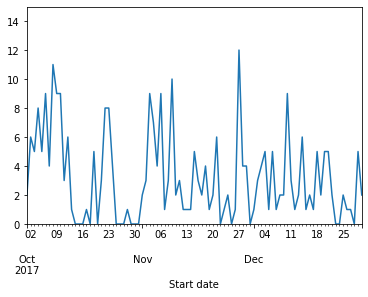

In [31]:
import matplotlib.pyplot as plt

# Resample rides to daily, take the size, plot the results
rides.resample('D', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 15])

# Show the results
plt.show()

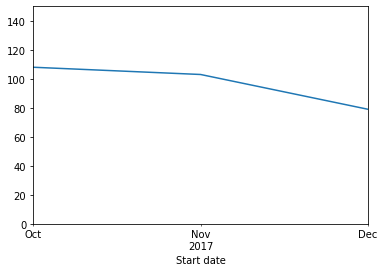

In [32]:
# Resample rides to monthly, take the size, plot the results
rides.resample('M', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 150])

# Show the results
plt.show()

In [33]:
monthly_rides = rides.resample('M', on="Start date")['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64


In [34]:
grouped = rides.groupby('Member type')\
  .resample('M', on="Start date")

# Print the median duration for each group
print(grouped['Duration'].median())

Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration, dtype: float64


### Additional datetime methods in Pandas ||  Wrap-up

In [35]:
# Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', 
                                						 ambiguous='NaT')

# Print first value
print(rides['Start date'].iloc[0])

# Convert the Start date column to Europe/London
rides['Start date'] = rides['Start date'].dt.tz_convert('Europe/London')

# Print the new value
print(rides['Start date'].iloc[0])

2017-10-01 15:23:25-04:00
2017-10-01 20:23:25+01:00


In [36]:
# Add a column for the weekday of the start of the ride
# rides['Ride start weekday'] = rides['Start date'].dt.weekday_name
rides['Ride start weekday'] = rides['Start date'].dt.day_name()

# Print the median trip time per weekday
print(rides.groupby('Ride start weekday')['Duration'].median())

Ride start weekday
Friday       684.0
Monday       922.5
Saturday     610.0
Sunday       625.0
Thursday     659.0
Tuesday      644.0
Wednesday    629.0
Name: Duration, dtype: float64


In [38]:
rides['End date'].shift(1)

0                     NaT
1     2017-10-01 15:26:26
2     2017-10-01 17:49:59
3     2017-10-02 06:42:53
4     2017-10-02 09:18:03
              ...        
285   2017-12-29 12:46:16
286   2017-12-29 14:43:46
287   2017-12-29 15:18:51
288   2017-12-29 20:38:13
289   2017-12-30 13:54:33
Name: End date, Length: 290, dtype: datetime64[ns]

In [40]:
# EN LA MISMA ZONA HORARIA
rides['End date'] = rides['End date'].dt.tz_localize('America/New_York', 
                                						 ambiguous='NaT')
rides['End date'] = rides['End date'].dt.tz_convert('Europe/London')

In [42]:
# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample('M', on="Start date")

# Print the average hours between rides each month
print(monthly['Time since'].mean()/(60*60))

Start date
2017-10-31 00:00:00+00:00    5.519242
2017-11-30 00:00:00+00:00    7.256474
2017-12-31 00:00:00+00:00    9.202380
Name: Time since, dtype: float64
